# Pre-procesamiento de los datos de trayectorias de Albatros

## Limpieza de datos

In [6]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/trajectories.csv')
geo_df = gpd.GeoDataFrame(df, geometry=df['geom'].apply(wkt.loads))
geo_df.head()

,id,geom,date,latitude,longitude,name,season,spheroid_dist_to_colony,sst,geometry
0,1,POINT(-118.327013 29.110365),2014-01-19,29.110365,-118.32701,LAAL01,incubacion,0.0,17.581,POINT (-118.32701 29.11037)
1,2,POINT(-118.327008 29.110315),2014-01-19,29.110315,-118.32701,LAAL01,incubacion,0.0,17.581,POINT (-118.32701 29.11031)
2,3,POINT(-118.327022 29.11034),2014-01-19,29.110340,-118.32702,LAAL01,incubacion,0.0,17.581,POINT (-118.32702 29.11034)
3,4,POINT(-118.327045 29.110412),2014-01-19,29.110413,-118.32704,LAAL01,incubacion,0.0,17.581,POINT (-118.32704 29.11041)
4,5,POINT(-118.326942 29.110427),2014-01-19,29.110428,-118.32694,LAAL01,incubacion,0.0,17.581,POINT (-118.32694 29.11043)


(23.0, 55.0)

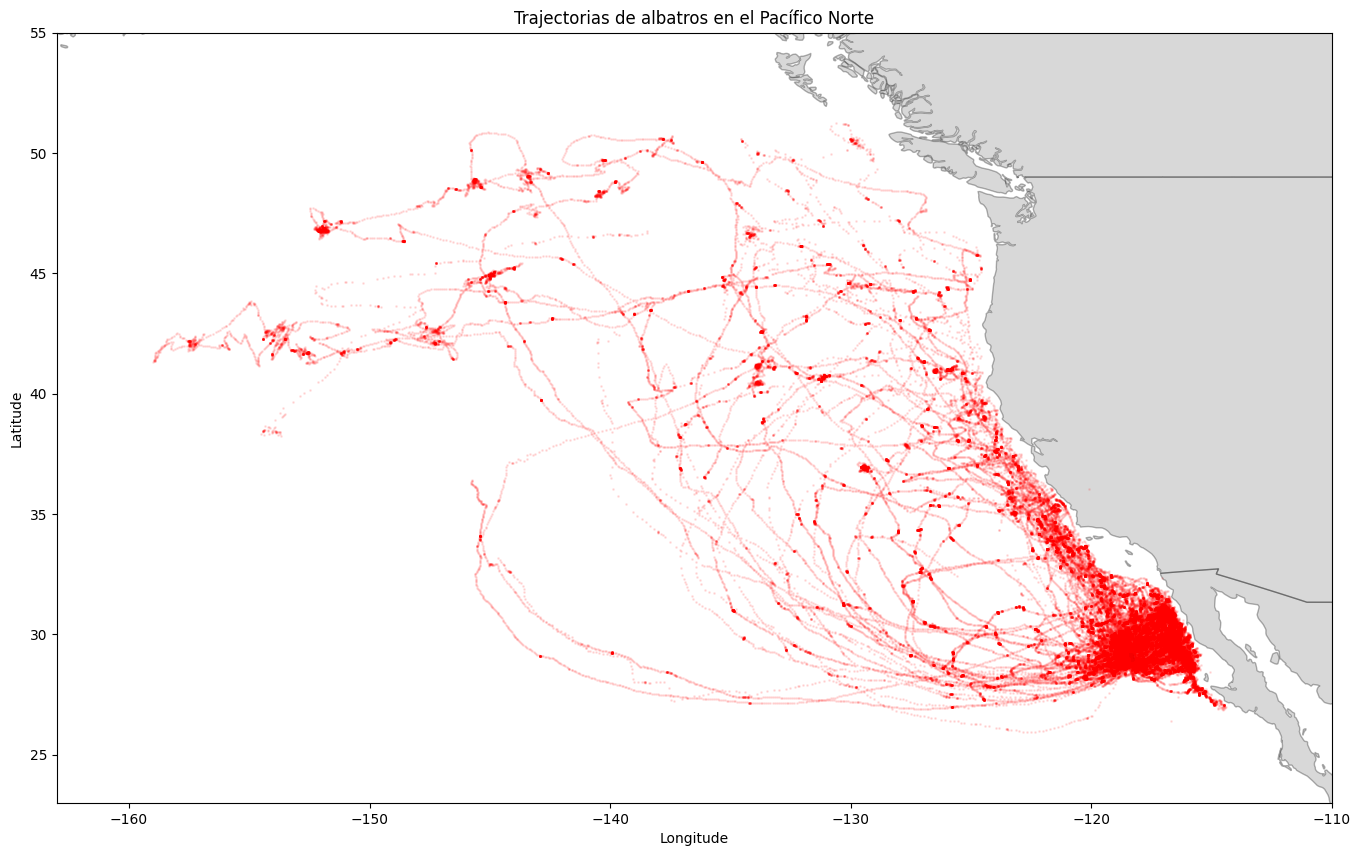

In [2]:
# Mapa de la zona de estudio
import matplotlib.pyplot as plt

shapefile_name = '../data/americas_shapefile.csv'
# Load shapefile from csv
shp_df = pd.read_csv(shapefile_name)

shapefile = gpd.GeoDataFrame(shp_df, geometry=shp_df['geom'].apply(wkt.loads))

base = shapefile.plot(figsize=(25, 10), alpha=0.3, edgecolor='k', color='gray')
geo_df.plot(ax=base, alpha=0.1, marker='o', markersize=1, color='red')

# Ejes
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Título
plt.title('Trajectorias de albatros en el Pacífico Norte')

# Zoom in to see the trajectories

min_lat = 23
max_lat = 55
min_lon = -163
max_lon = -110

plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)

<Axes: xlabel='longitude', ylabel='latitude'>

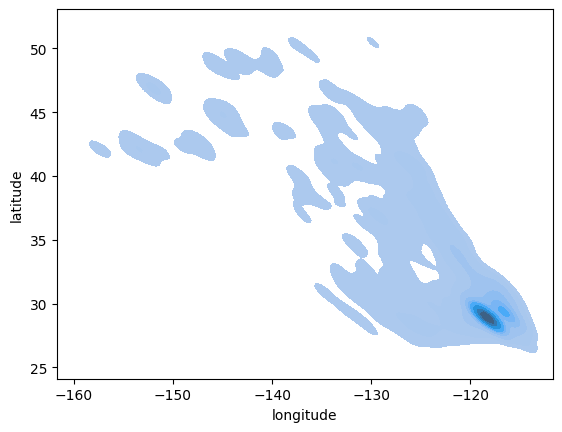

In [4]:
import seaborn as sns

# Plot kernel density estimation of the trajectories using a base map

sns.kdeplot(data = geo_df, x = geo_df['longitude'], y = geo_df['latitude'], fill=True,)

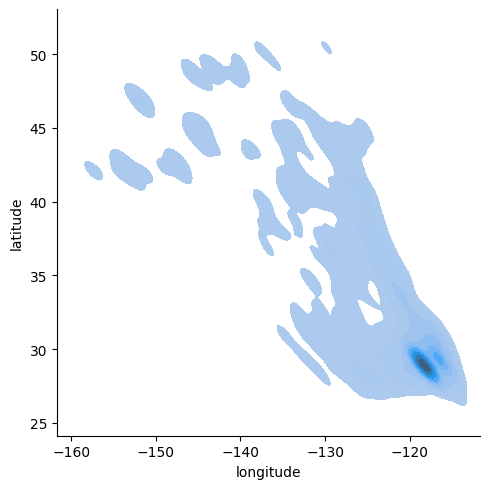

In [5]:
sns.displot(data = geo_df, x = geo_df['longitude'], y = geo_df['latitude'], kind='kde', fill=True,)

In [ ]:
# Buscar duplicados en el campo geom

duplicated_geometries = geo_df['geom'].value_counts(dropna=False).loc[lambda x : x>1]
duplicated_geometries

In [ ]:
duplicated_geometries.hist(bins=10)
duplicated_geometries.value_counts() # 4982 geometrías que se repiten 2 veces

# Titulo
plt.title('Número de geometrías repetidas y su frecuencia')

## Integración de datos

## Reducción de datos

## Trasformación de datos